## Exploratory Analysis of Housing Data
Before attempting to predict the price of our houses, we first want to get a sense of what our data looks like.

In [40]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(rc={'figure.figsize':(12,6)},font_scale=1.5,style='whitegrid')

## Data Import and Manipulation
When you ask your computer to import data, you must specify from where this data should be taken. This is generally done (for data at our scale) through explicit pointing to a file. Your computer does not understand what you mean if you simply ask it for a certain file, so you must point it directly to this data. This is done using a filepath. If you know where your data is, simply type that location, otherwise dragging and dropping into terminal will generally show you the filepath which you can then place in the fp variable.

In [41]:
fp = 'data/cleaned_allyears.csv' #Filepath: '/root/Folder/file.extension' 
data = pd.read_csv(fp) #Import data using filepath

/Users/Nicole/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
# list all of the columns we have in our dataset
data.columns

Index(['ADDRESS', 'BLOCK', 'BOROUGH', 'BUILDING CLASS AT PRESENT',
       'BUILDING CLASS AT TIME OF SALE', 'BUILDING CLASS CATEGORY',
       'COMMERCIAL UNITS', 'GROSS SQUARE FEET', 'LAND SQUARE FEET', 'LOT',
       'NEIGHBORHOOD', 'RESIDENTIAL UNITS', 'SALE DATE', 'SALE PRICE',
       'TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', 'TOTAL UNITS',
       'YEAR BUILT', 'ZIP CODE', '30 Year Rate', '15 Year Rate', 'AGE'],
      dtype='object')

In [43]:
data.shape

(166968, 22)

There are 166,968 properties in this data set with sale dates ranging from September 2016 to December 2018. 

In [44]:
# let's take a look at the data
data.head()

,ADDRESS,BLOCK,BOROUGH,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE,BUILDING CLASS CATEGORY,COMMERCIAL UNITS,GROSS SQUARE FEET,LAND SQUARE FEET,LOT,...,SALE DATE,SALE PRICE,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE,TOTAL UNITS,YEAR BUILT,ZIP CODE,30 Year Rate,15 Year Rate,AGE
0,153 AVENUE B,392,1,C2,C2,07 RENTALS - WALKUP APARTMENTS,0.0,6440,1633,6,...,7/19/17,6625000,2A,2,5.0,1900.0,10009.0,4.03,3.29,117.0
1,234 EAST 4TH STREET,399,1,C7,C7,07 RENTALS - WALKUP APARTMENTS,3.0,18690,4616,26,...,12/14/16,-,2,2,31.0,1900.0,10009.0,4.13,3.36,116.0
2,197 EAST 3RD STREET,399,1,C7,C7,07 RENTALS - WALKUP APARTMENTS,1.0,7803,2212,39,...,12/9/16,-,2,2,17.0,1900.0,10009.0,4.13,3.36,116.0
3,154 EAST 7TH STREET,402,1,C4,C4,07 RENTALS - WALKUP APARTMENTS,0.0,6794,2272,21,...,9/23/16,3936272,2B,2,10.0,1913.0,10009.0,3.48,2.76,103.0
4,301 EAST 10TH STREET,404,1,C2,C2,07 RENTALS - WALKUP APARTMENTS,0.0,4615,2369,55,...,11/17/16,8000000,2A,2,6.0,1900.0,10009.0,3.94,3.14,116.0


## Formatting data into appropriate value type
The dataset contains characters and numbers meant to represent missing values that need to be converted as such. Some categorical values are also hard to understand, for they are represented as numbers. These issues will all be fixed accordingly.

In [45]:
# convert missing values into NaN 
data['LAND SQUARE FEET'].replace(to_replace=' -  ',value=np.nan,inplace=True)
data['GROSS SQUARE FEET'].replace(to_replace=' -  ',value=np.nan,inplace=True)
data['SALE PRICE'].replace(to_replace=' -  ',value=np.nan,inplace=True)

# Cast string values into numeric values
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'])
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'])
data['GROSS SQUARE FEET'] = pd.to_numeric(data['GROSS SQUARE FEET'])
data['TOTAL UNITS'] = pd.to_numeric(data['TOTAL UNITS'])

# make sure total units is the sum of residential and commercial units
data['TOTAL UNITS'] = data['COMMERCIAL UNITS'] + data['RESIDENTIAL UNITS']

# Convert 0 into NaN in columns where 0 is impossible/doesn't make sense
data['SALE PRICE'].replace(to_replace=0,value=np.nan,inplace=True)
data['LAND SQUARE FEET'].replace(to_replace=0,value=np.nan,inplace=True)
data['GROSS SQUARE FEET'].replace(to_replace=0,value=np.nan,inplace=True)
data['TOTAL UNITS'].replace(to_replace=0,value=np.nan,inplace=True)

# Clarify categorical values
data['BOROUGH'].replace(to_replace = [1,2,3,4,5], value = ['Manhattan','Bronx','Brooklyn','Queens','Staten Island'],inplace=True)
data['TAX CLASS AT TIME OF SALE'].replace(to_replace = [1,2,4], value = ['House','Condo','Not_Res'],inplace=True)



In [46]:
# number of missing values
data.isnull().sum()

ADDRESS                               0
BLOCK                                 0
BOROUGH                               0
BUILDING CLASS AT PRESENT            49
BUILDING CLASS AT TIME OF SALE        0
BUILDING CLASS CATEGORY               0
COMMERCIAL UNITS                     49
GROSS SQUARE FEET                 58900
LAND SQUARE FEET                  63913
LOT                                   0
NEIGHBORHOOD                          0
RESIDENTIAL UNITS                    49
SALE DATE                             0
SALE PRICE                        49741
TAX CLASS AT PRESENT                 49
TAX CLASS AT TIME OF SALE             0
TOTAL UNITS                       40796
YEAR BUILT                            1
ZIP CODE                              1
30 Year Rate                          0
15 Year Rate                          0
AGE                               13267
dtype: int64

### Dealing with missing values
1. Drop features that we do not want to consider
2. For features with relatively few missing values, we will remove the instances that have missing values
3. For gross and land square feet, we will leave and attempt to impute them using various model techniques later on.

In [47]:
# Drop these columns because we dont want to introduce data that is post sale, 
# for we should only know information up to the sale data, or there could be potential data leakage
data.drop(labels='BUILDING CLASS AT PRESENT', inplace=True, axis=1)
data.drop('TAX CLASS AT PRESENT', inplace=True, axis=1)

In [48]:
data.isnull().sum()

ADDRESS                               0
BLOCK                                 0
BOROUGH                               0
BUILDING CLASS AT TIME OF SALE        0
BUILDING CLASS CATEGORY               0
COMMERCIAL UNITS                     49
GROSS SQUARE FEET                 58900
LAND SQUARE FEET                  63913
LOT                                   0
NEIGHBORHOOD                          0
RESIDENTIAL UNITS                    49
SALE DATE                             0
SALE PRICE                        49741
TAX CLASS AT TIME OF SALE             0
TOTAL UNITS                       40796
YEAR BUILT                            1
ZIP CODE                              1
30 Year Rate                          0
15 Year Rate                          0
AGE                               13267
dtype: int64

## Creating new informative features
It would be helpful to coarsen sale date to a yearly and monthly level to observe time trends

In [50]:
# convert sale date feature to date time format, create year and month categorial features
data['SALE_DATE'] = pd.to_datetime(data['SALE DATE'])
data['Year'] = data.SALE_DATE.dt.year.astype(str)
data['Month'] = data.SALE_DATE.dt.month.astype(str)

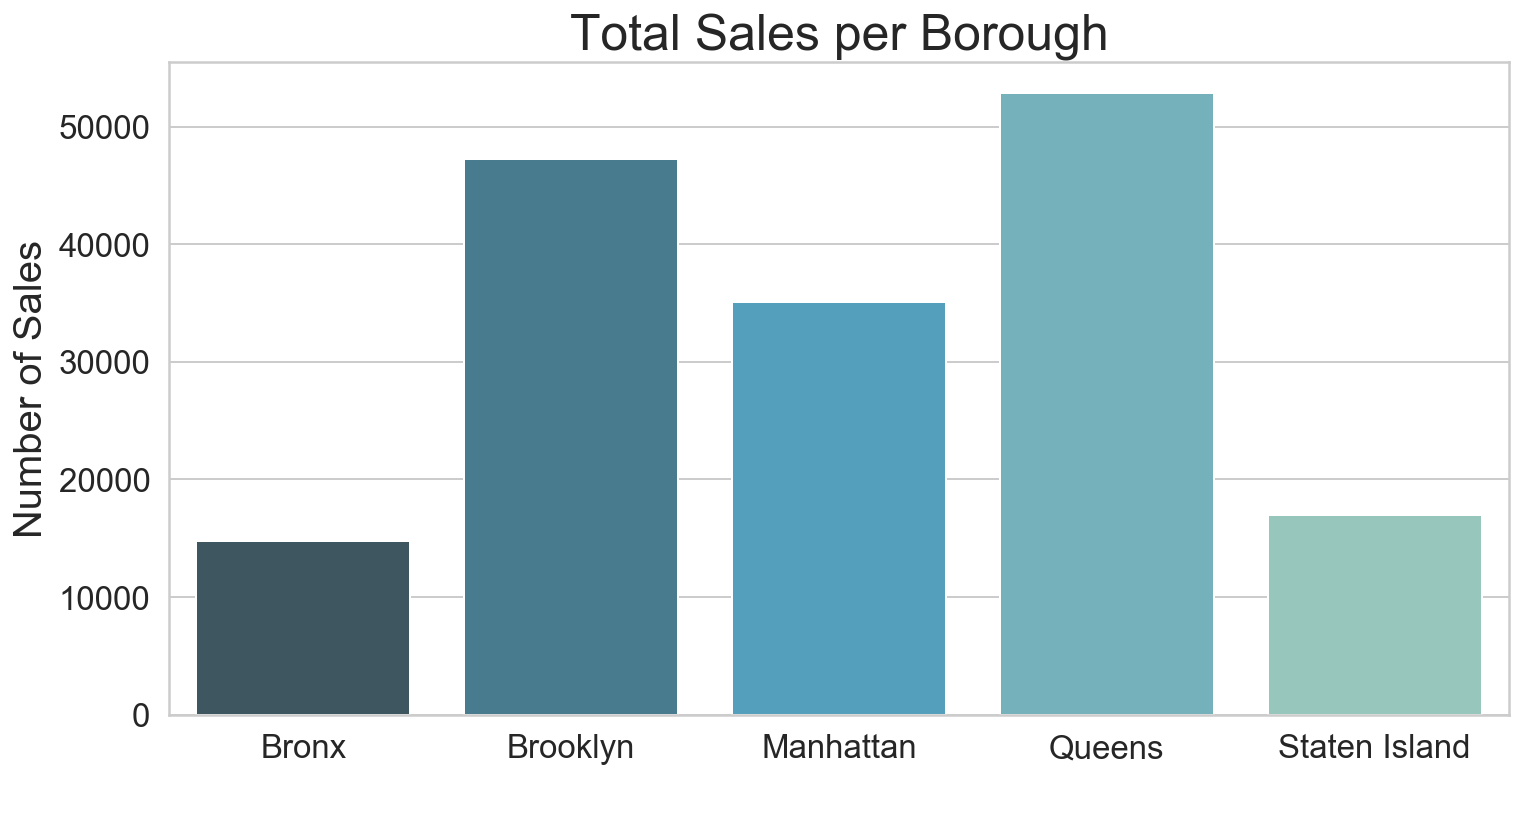

In [51]:
# Histogram of total sales per borough
by_boro = data[['BOROUGH','ADDRESS']].groupby('BOROUGH').count()
plot = sns.barplot(data=by_boro.transpose(),palette='GnBu_d')
plot.set_title('Total Sales per Borough',fontsize=25)
plot.set_ylabel('Number of Sales',fontsize=20)
plot.set_xlabel(' ',fontsize=20)
sns.mpl.pyplot.savefig('sales_borough.png',bbox_inches = 'tight')

Bulk of sales is in Brooklyn, Manhattan and Queens.

In [57]:
data['SALE PRICE'].describe()

count    1.172270e+05
mean     1.586716e+06
std      1.410004e+07
min      1.000000e+00
25%      3.860000e+05
50%      6.440000e+05
75%      1.075178e+06
max      2.397502e+09
Name: SALE PRICE, dtype: float64

In [56]:
# Find percentage of properties sold for over 10 million
data[data['SALE PRICE']>10000000].shape[0] / data.shape[0]

0.011205740022040151

The mean sale price is 1.5 million and the median is $644,000. The large differnce between the two indicate the data is highly skewed, with a small amount of very expensive properties. Only 1% of all properties have sale price greater than 10 million.

In [58]:
# ONLY keep rows with sales price greater than 100,000
model_data = data[(data['SALE PRICE'] > 100000) & (data['SALE PRICE'] < 10000000) ] 

In [59]:
# drop all rows with 1 more more Nan (for sake of plotting)
model_data.dropna(axis=0,how='any',inplace=True)

/Users/Nicole/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/Users/Nicole/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


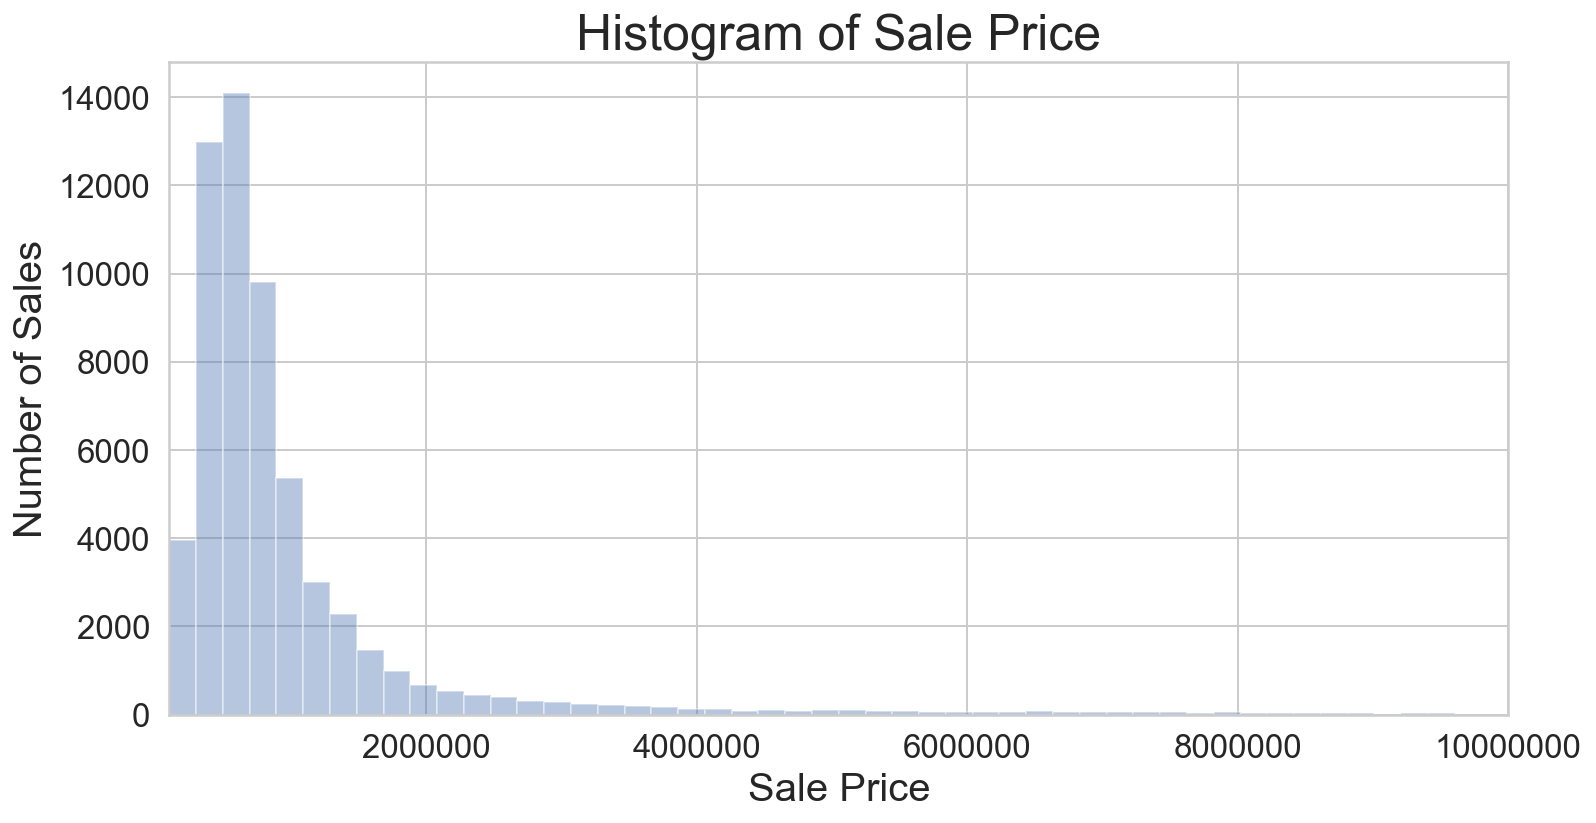

In [60]:
# histogram of sale price
histo = sns.distplot(model_data['SALE PRICE'],kde=False)
histo.set_title('Histogram of Sale Price',fontsize=25)
histo.set_ylabel('Number of Sales',fontsize=20)
histo.set_xlabel('Sale Price',fontsize=20)
histo.set_xlim(100000,10000000)
sns.mpl.pyplot.ticklabel_format(style='plain', axis='x')
sns.mpl.pyplot.savefig('prices_hist.png',bbox_inches = 'tight')